# Lab 2: Sentence Similarity Analysis

Lab session by:
* Daniel Hess
* Pandelis Laurens Symeonidis

### Imports

In [33]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.metrics.distance import jaccard_distance
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np


### Data Loading

In [42]:
# Load data
dt = pd.read_csv('./STS.input.SMTeuroparl.txt',sep='\t',header=None)
gold_standard_dt = pd.read_csv('./STS.gs.SMTeuroparl.txt',sep='\t',header=None)

# Download corpus
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)

True

### Preprocessing function

In [ ]:
# Tokenize and option to make sentences all lower and/or removal of SW for analysis
def preprocess_sentences(sentences, lowercase=False, remove_stopwords=False): 
    sw = set(stopwords.words('english'))
    processed = []
    for s in sentences:
        tokens = nltk.word_tokenize(s)
        if lowercase:
            tokens = [t.lower() for t in tokens]
        if remove_stopwords:
            tokens = [t for t in tokens if t.lower() not in sw]
        processed.append(tokens)
    return processed

### Similarity evaluation

In [ ]:
# Calculate jaccard distance for each sentence pair and  Pearson coefficient between similarity scores and gold standard
def evaluate_similarity(dt, lowercase=False, remove_stopwords=False):
    sent1 = preprocess_sentences(dt[0], lowercase, remove_stopwords)
    sent2 = preprocess_sentences(dt[1], lowercase, remove_stopwords)

    jaccard_distances = [
        jaccard_distance(set(s1), set(s2)) for s1, s2 in zip(sent1, sent2) 
    ]
    similarity_scores = [1 - d for d in jaccard_distances]

    corr = pearsonr(similarity_scores, gold_standard_dt[0])[0] # Calculate Pearson coefficient between similarity scores and gold standard
    return similarity_scores, corr

### Run cases

In [ ]:
# Run all scenarios for comparison
similarity_scores_original, corr_original = evaluate_similarity(dt, lowercase=False, remove_stopwords=False)
similarity_scores_lower, corr_lower = evaluate_similarity(dt, lowercase=True, remove_stopwords=False)
similarity_scores_stop, corr_stop = evaluate_similarity(dt, lowercase=False, remove_stopwords=True)
similarity_scores_both, corr_both = evaluate_similarity(dt, lowercase=True, remove_stopwords=True)

print("Original correlation:", corr_original)
print("Lowercase correlation:", corr_lower)
print("Stopword removal correlation:", corr_stop)
print("Lowercase + Stopword removal correlation:", corr_both)


Original correlation: 0.4504977169318684
Lowercase correlation: 0.4624951397591497
Stopword removal correlation: 0.4373710526352063
Lowercase + Stopword removal correlation: 0.4451596378377866


### Analysis

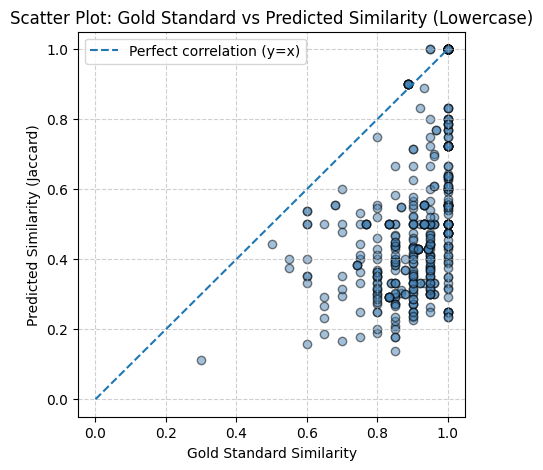

In [ ]:
x = (gold_standard_dt[0]/5).values  # gold standard scores
y = similarity_scores_lower # predicted scores

plt.figure(figsize=(5,5))
fig, ax_arr = plt.subplots(2, 2, fig_size=(20, 20))
ax_arr[0].scatter(x, y, alpha=0.5, color="steelblue", edgecolor="k")
ax_arr[0].plot([0, 1], [0, 1], '--', label="Perfect correlation (y=x)")  # gold scores range 0–5
ax_arr[0].xlabel("Gold Standard Similarity")
ax_arr[0].ylabel("Predicted Similarity (Jaccard)")
ax_arr[0].title("Scatter Plot: Gold Standard vs Predicted Similarity (Lowercase)")
ax_arr[0].legend()
ax_arr[0].grid(True, linestyle="--", alpha=0.6)
fig.show()

The results show that making the sentences lowercase improves the correlation with human similarity judgments slightly (r = 0.462 vs 0.450), which shows that case normalization helps reduce some superficial differences, making the sentence matching slightly more forgiving. On the other hand, stopword removal reduced the correlation (r = 0.437), suggesting that stopwords ("the", "and", "to", etc) still provide useful information for sentence matching similarity measures like Jaccard. Combining both methods yielded performance similar to the baseline (r = 0.445). Overall, this highlights how preprocessing choices can influence evaluation results, even with a simple metric.